In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import cv2

In [3]:
import re

In [4]:
import sys

In [5]:
from importlib import reload

In [517]:
import transforms as tfs
import dataset as dataset

# Load image

In [473]:
def compare_2_pics(img1, img2, title1, title2):
    plt.subplot(121)
    plt.imshow(img1)
    plt.title(title1)
    plt.xticks([])
    plt.yticks([])
    
    plt.subplot(122)
    plt.imshow(img2)
    plt.title(title2)
    plt.xticks([])
    plt.yticks([])
    
    plt.tight_layout()

In [505]:
DATA_DIR = os.path.realpath('../../data/pictures/NumBase')

In [506]:
fnames = sorted([fname for fname in os.listdir(DATA_DIR) if re.fullmatch('[a-zA-Z]\d{3}[a-zA-Z]{2} \d+\.bmp', fname) is not None])
len(fnames)

4103

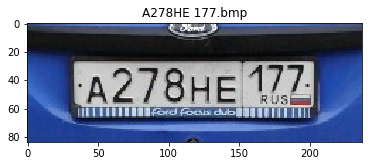

In [524]:
img_id = 226
fname = fnames[img_id]
img = cv2.imread(os.path.join(DATA_DIR,fname))
plt.imshow(img)
plt.title(fname)
plt.show()

In [508]:
tfs = reload(tfs)

In [509]:
t_norm = tfs.ImageNormalization()
t_scale = tfs.ImageScaling()
t_type = tfs.ToType()
t_gscale = tfs.ToGreyScale()
t_crop = tfs.RandomCrop()
t_bc = tfs.ChangeBrightnessContrast()

In [510]:
new_img = t_crop(t_gscale(t_type(t_scale(t_norm(img), (100,300)))), (70,250))

In [511]:
from sys import getsizeof

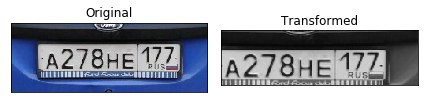

In [512]:
compare_2_pics(img, new_img, 'Original', 'Transformed')

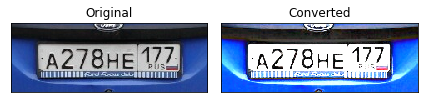

In [513]:
compare_2_pics(img, t_bc(img, 'random','random'), 'Original', 'Converted')

# Set Dataset

In [652]:
tfs = reload(tfs)
dataset = reload(dataset)

In [653]:
t_norm = tfs.ImageNormalization()
t_scale = tfs.ImageScaling((100,200))
t_type = tfs.ToType()
t_gscale = tfs.ToGreyScale()
t_crop = tfs.RandomCrop((80,180))
t_rot = tfs.ImageRotation()
t_bc = tfs.ChangeBrightnessContrast()

In [666]:
ds = dataset.OcrDataset(DATA_DIR, DATA_DIR,
                        transforms=[t_norm, t_scale, t_type, t_gscale, t_crop, t_rot, t_bc])

Text(0.5, 1.0, 'A380K')

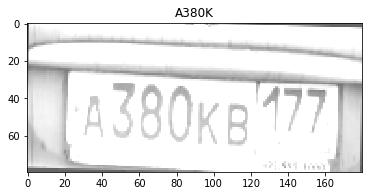

In [687]:
idx = 257
img, t = ds.__getitem__(idx)
plt.imshow(img)
plt.title(t)